# Experiment: Glucose Concentration In Water

Yet another experiment on glucose concentration in water.

This use a new tray made from Foil-Matte as SERs.

Each collection start from pure water then 1 tea spoon of glucose.

There are 7 measurements start from water-0 (no glucose) to water-6 (6 tea spoon of glucose).

In [9]:
from pathlib import Path
from raman.sample import read_txt, Sample, accumulate
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps
cmap = colormaps['cividis']

def add_plot_label():
    plt.xlabel("Raman Shift (cm^-1)")
    plt.ylabel("Intensity")
    plt.grid()

BASE_PATH:Path = Path("/app")

## 1. Glucose

0 /app/data/water-glucose-SERs/5x/txt/water-0_5x_0-71_600_785 nm_120 s_5_2024_12_17_13_57_17_01.txt
1 /app/data/water-glucose-SERs/5x/txt/water-1_5x_0-71_600_785 nm_120 s_5_2024_12_17_14_08_45_01.txt
2 /app/data/water-glucose-SERs/5x/txt/water-2_5x_0-71_600_785 nm_120 s_5_2024_12_17_14_20_24_01.txt
3 /app/data/water-glucose-SERs/5x/txt/water-3_5x_0-71_600_785 nm_120 s_5_2024_12_17_14_34_09_01.txt
4 /app/data/water-glucose-SERs/5x/txt/water-4_5x_0-71_600_785 nm_120 s_5_2024_12_17_15_00_50_01.txt
Found 2 spike(s) in path=/app/data/water-glucose-SERs/5x/txt/water-4_5x_0-71_600_785 nm_120 s_5_2024_12_17_15_00_50_01.txt, self.remove_spike() is perform automatically.
5 /app/data/water-glucose-SERs/5x/txt/water-5_5x_0-71_600_785 nm_120 s_5_2024_12_17_15_14_52_01.txt
6 /app/data/water-glucose-SERs/5x/txt/water-6_5x_0-71_600_785 nm_120 s_5_2024_12_17_15_26_40_01.txt


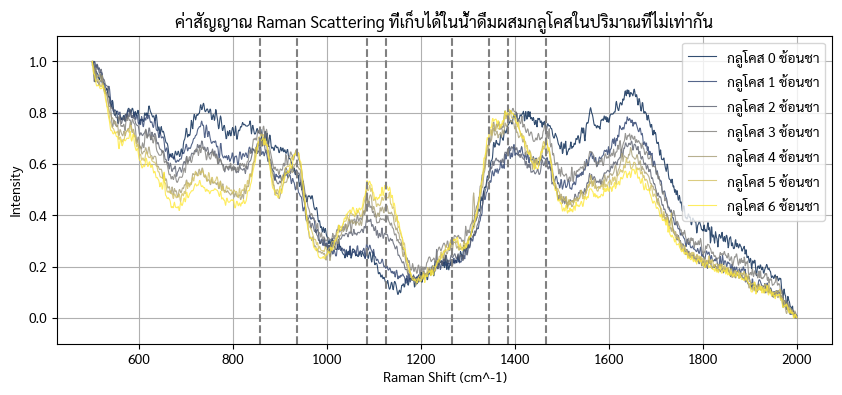

In [21]:
DATA_PATH:Path = BASE_PATH.joinpath("data/water-glucose-SERs/5x/txt")

plt.figure(figsize=(10,4))
samples:list[Sample] = []
colors = cmap(np.linspace(0, 1, 7))
for i, path in enumerate(sorted(DATA_PATH.glob("water*.txt"))):
    print(i, path)
    sample = read_txt(path=path, verbose=True)
    sample.extract_range(low=500, high=2000)
    sample.normalized(method="minmax")
    samples.append(sample)
    num_glucose = sample.name.split('-')[1]
    sample.plot(label=f"กลูโคส {num_glucose} ช้อนชา", color=colors[i])

plt.title(f"ค่าสัญญาณ Raman Scattering ที่เก็บได้ในน้ำดื่มผสมกลูโคสในปริมาณที่ไม่เท่ากัน")
peaks = [858,935,1086,1125,1265,1345,1385,1465]
for peak in peaks:
    plt.vlines(x=peak, ymin=-0.1, ymax=1.1, color='grey', ls='--')
    # plt.text(s=peak, x=peak+2, y=glucose_5x_acc.at(peak), color='grey')

plt.legend()
# plt.vlines(x=1125, ymin=-1, ymax=2, color='grey', ls='--')
plt.ylim(-0.1, 1.1)
add_plot_label()
plt.show()

In [8]:
samples[1]


  Sample: water-0
    date: 2024-12-17 13:57:17
 grating: 600
   laser: 785 nm
   power: 0.71
    lens: 5x
exposure: 120 s
    accu: 5
    stat: Max=1.0 Min=0.0 Mean=0.53 Std=0.26

0 /app/data/glucose/10x/txt/glucose_600_785 nm_90 s_1_2024_10_29_15_11_45_01.txt
Found 1 spike(s) in path=/app/data/glucose/10x/txt/glucose_600_785 nm_90 s_1_2024_10_29_15_11_45_01.txt, self.remove_spike() is perform automatically.


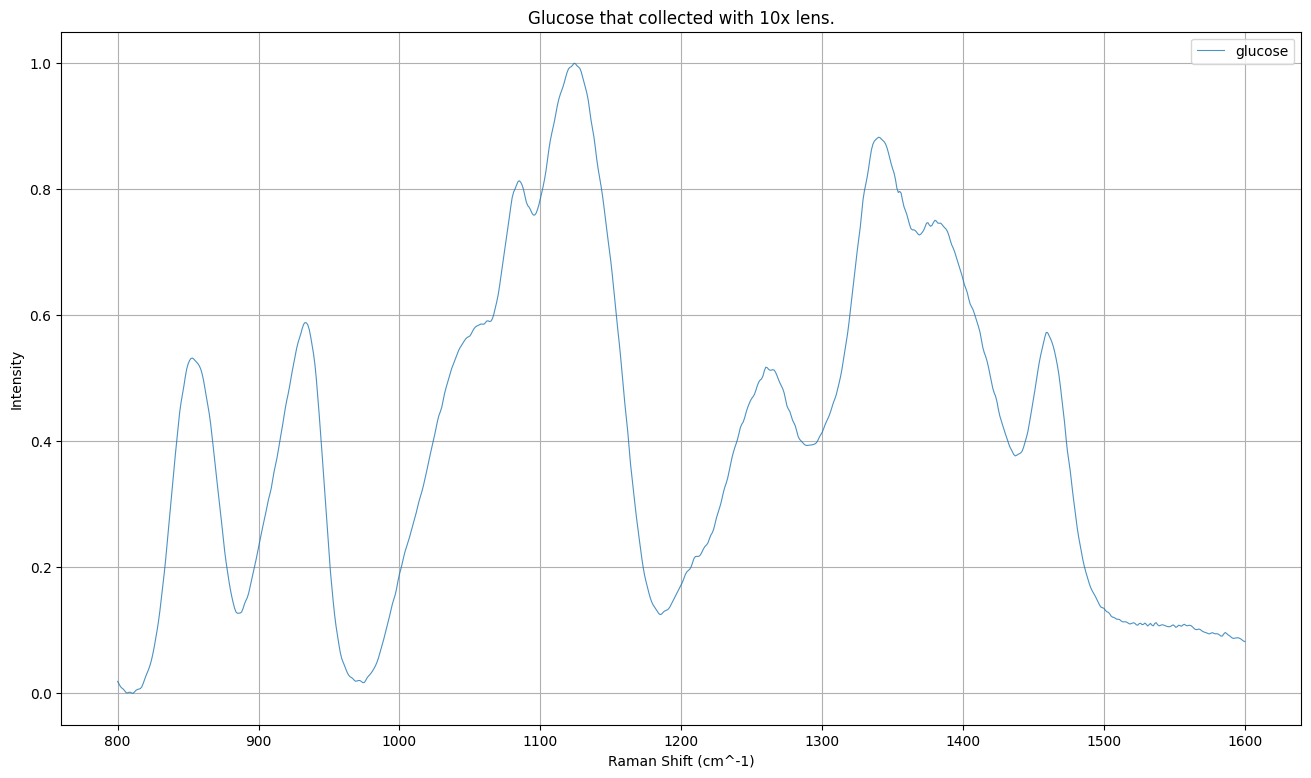

In [16]:
DATA_PATH:Path = BASE_PATH.joinpath("data/glucose/10x/txt")

plt.figure(figsize=(16,9))
glucose_10x:list[Sample] = []
for i, path in enumerate(sorted(DATA_PATH.glob("*.txt"))):
    print(i, path)
    # old name format
    name_format = ["name", "grating", "laser", "exposure", "accumulation", "year", "month", "date", "hour", "minute", "second", "01"]
    sample = read_txt(path=path, verbose=True, name_format=name_format)
    sample.extract_range(low=800, high=1600)
    sample.normalized(method="minmax")
    glucose_10x.append(sample)
    sample.plot()

plt.title(f"Glucose that collected with 10x lens.")
plt.legend()
add_plot_label()
plt.show()

In [17]:
glucose_5x_acc = accumulate(glucose_5x)
glucose_10x_acc = accumulate(glucose_10x)

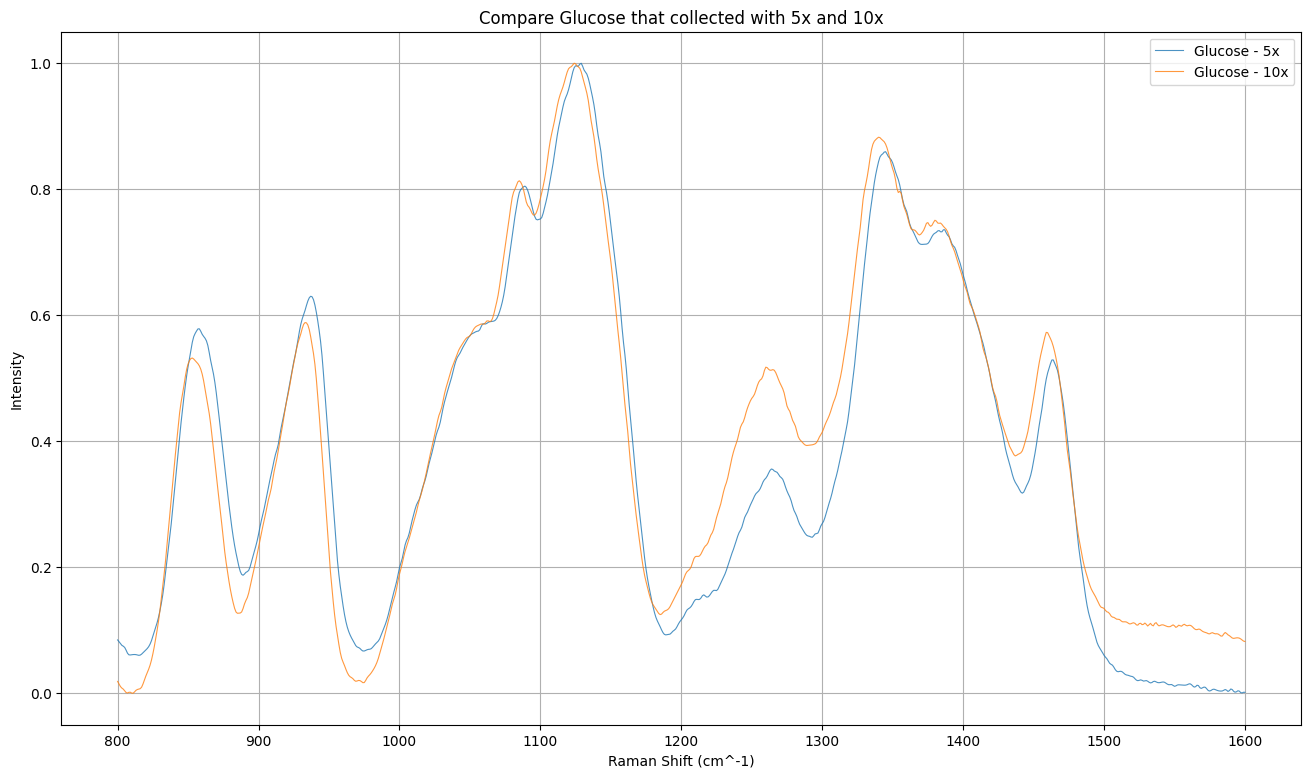

In [20]:
DATA_PATH:Path = BASE_PATH.joinpath("data/glucose/10x/txt")

plt.figure(figsize=(16,9))
glucose_5x_acc.plot(label="Glucose - 5x")
glucose_10x_acc.plot(label="Glucose - 10x")
plt.title(f"Compare Glucose that collected with 5x and 10x")
plt.legend()
add_plot_label()
plt.show()